# Machine Learning Exam 2 - Evan Callaghan

### 1. True or False

#### a) In AdaBoost weights of misclassified examples go up by the same multiplicative factor. TRUE
#### b) In AdaBoost the weak learner are trained in parallel. FALSE
#### c) k-means is affected by outliers. TRUE
#### d) Gradient boosting can’t overfit the training dataset. FALSE
#### e) Gradient boosting always outperforms AdaBoost. FALSE
#### f) k-means results can be used as feature engineering technique. TRUE
#### g) A decision tree with depth equal to 3 has a higher variance than a tree with depth equal to 1. TRUE
#### h) A decision tree with depth equal to 3 has a higher bias than a tree with depth equal to 1. FALSE
#### i) For two runs of k-mean++, it is expected to get same clustering results. FALSE
#### j) In spectral clustering, k-means++ is used to cluster the first k-eigenvectors of the normalized graph Laplacian matrix. TRUE



### 2. Which of the following is/are TRUE about boosting trees?

#### E. B and C are the true about boosting trees. In boosting trees, the trees are grown in sequence and Boosting is a method for improving the performance by aggregating the results of weak learners.



### 3. Which of the following algorithms doesn’t use learning rate as one of its hyperparameters?

#### E. Decision trees and Random Forest does not use learning rate.



### 4. Decision trees are one of the most popular machine learning algorithm because of its flow-chart structure. That said, what is/are the risks of increasing the depth of a decision tree?

#### Increasing the depth of a decison tree, which increases the complexity of the model, increases the chances of over-fitting the data. The training error may decrease, but the model will not be able to capture useful patterns found within the data and it will not be well generalized well to the data. Ultimately resulting in the testing error being significantly large. 



### 5. Can k-means be used to identify outliers in a given dataset?

#### Yes, K-means could be used to identify outliers in a given data set. Once all observations are assignned to a cluster, we could compute the distance between it and the cluster center. Distances that are abnormally large could be dtermined to be outliers in the data set.



### 6. In which of the following cases will k-means fail to give good results?

#### E. K-means will fail to give good results in the case when the dataset has outliers and when the dataset has non-convex shapes.



### 7. Assume, you want to cluster 7 observations into 3 clusters using k-means clustering algorithm. After a few iterations clusters, C1, C2, C3 has following observations: C1 : {(2, 2),(4, 4),(6, 6)}, C2 : {(2, 4),(4, 2)}, C3 : {(5, 5),(9, 9)}. 

### a) Report the cluster centroids.

#### Centroid 1 = ((2+4+6)/3, (2+4+6)/3) = (4, 4)
#### Centroid 2 = ((2+4)/2, (4+2)/2) = (3, 3)
#### Centroid 3 = ((5+9)/2, (5+9)/2) = (7, 7)

### b) Assuming that we have a new observation (3,3). To which cluster would you assign the new observation? 

#### When assigning a new observation to a cluster, it will be assigned to the cluster with the minimal distance between the new observation and the cluster centroid. In our case, we would assign the new observation to Cluster 2 because the distance from the cluster centroid and the new observation is zero.



### 8. During the last five years, big tech visionaries such as Jeff Bezos and Elon Musk have been heavily interested in space research. Lets assume that you are working for Elon Musk in SpaceX, and your first project as a data scientist is to build a decision tree that classifies humans and martians based on the following characteristics: Green, Legs, Height, Smelly. The data is shown the below tables. Using the above data, the below decision is built.

### a) Report the depth of tree.
#### The tree is of depth = 3

### b) Report the training error rate of the decision-tree. Notice that the error rate is computed as number of all incorrect predictions divided by the total number of data points in the dataset.

#### All observations are correctly classified. Training Error Rate = 0%

### c) Without using Python, build a decision tree with the same error rate, as the one presented, but less complex.

#### Decision tree attached in submission as picture. It is a less complex model because its depth is two.



### 9. In Random Forest a data scientist can generate hundreds of trees, say T1, T2, . . . , Tn, and then aggregate the results of these trees. Which of the following is TRUE about each individual tree in Random Forest?

#### E. It is true that each individual tree is built on a subset of the features and a subset of observations.



### 10. Feature scaling is an important step before applying k-means algorithm on a dataset. What is the reason behind this? 

#### Feature scaling is an important step before applying k-means because the algorithm relies on Euclidean distance, and the Euclidean distance is highly affected when the input variables are in different ranges.



### 12. For binary classification, which of the following statements are TRUE of AdaBoost with decision trees as learners?

#### A, B, and C are true.  AdaBoost with decision trees as learners usually: has lower bias than a single decision tree, is popular because it usually works well even before any hyper-parameter tuning, and assigns higher weights to observations that have been misclassified.


### 13. Suppose a gradient boosting model with 1000 trees and learning rate equal to 0.01 for some binary classification task produce the following results. In order to make predictions, we need to threshold P(Y = 1|X). We want to decide between three possible thresholds for P(Y = 1|X): Model 1 uses a threshold of T = 0.25, Model 2 uses a threshold of T = 0.50, and Model 3 uses a threshold of T = 0.75

### a) What is the precision of Model 3?

#### Using a threshold of 0.75, Obs. 1 is predicted to be 1 and all other obs. are predicted to be 0. Therefore, True Positives = 1, False Positive = 0
#### Precision = TP / (TP + FP) = 100%

### b) What is the recall of Model 3?

#### In Model 3, True Positives = 1, False Negatives = 2
#### Recall = TP / (TP + FN) = 33%

### c) Suppose the model was built to predict whether or not an individual has some disease. If we predict that they do, we call them in for further testing. Which of the three model is best suited for this task? and why?

#### In this scenario, it is best to select a model with a high recall value; that is, hardly missing any actual positives in the classification process. In the case of a high recall value, we would select Model 1 because it has the highest recall score of any of the considered thresholds (100%).


### 14. In each iteration of gradient boosting, the misclassification penalty for a particular training observation is increased going from iteration t to iteration t + 1 if the observation was...

#### E. B and C are both correct. The misclassification penalty for a particular training observation is increased going from iteration t to iteration t + 1 if the observation was classified incorrectly by the full ensemble trained up to iteration t or was classified incorrectly by a majority of the weak learners trained up to iteration t.

In [1]:
import boto3
import pandas as pd
import numpy as np
from tqdm import tqdm
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from tqdm import tqdm
from itertools import product
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.metrics import recall_score, accuracy_score
pd.set_option('display.max_rows', None, 'display.max_columns', None)

In [1]:
## Defining the bucket
s3 = boto3.resource('s3')
bucket_name = 'data-445-bucket-callaghan'
bucket = s3.Bucket(bucket_name)

## Defining the csv file
file_key = 'weather.csv'

bucket_object = bucket.Object(file_key)
file_object = bucket_object.get()
file_content_stream = file_object.get('Body')


## 11 a) Using the pandas library to read the csv data file and creating a data-frame called weather

weather = pd.read_csv(file_content_stream)

## Making hpwren_timestamp a datetime variable
weather['hpwren_timestamp'] = pd.to_datetime(weather['hpwren_timestamp'])

## Selecting data up to October 31, 2011
weather = weather[weather['hpwren_timestamp'] <= pd.to_datetime('2011-10-31 23:59:59')]

## Removing any observations with missing values
weather = weather.dropna()

weather.head()

,rowID,hpwren_timestamp,air_pressure,air_temp,avg_wind_direction,avg_wind_speed,max_wind_direction,max_wind_speed,min_wind_direction,min_wind_speed,rain_accumulation,rain_duration,relative_humidity
1,1,2011-09-10 00:01:49,912.3,63.86,161.0,0.8,215.0,1.5,43.0,0.2,0.0,0.0,39.9
2,2,2011-09-10 00:02:49,912.3,64.22,77.0,0.7,143.0,1.2,324.0,0.3,0.0,0.0,43.0
3,3,2011-09-10 00:03:49,912.3,64.40,89.0,1.2,112.0,1.6,12.0,0.7,0.0,0.0,49.5
4,4,2011-09-10 00:04:49,912.3,64.40,185.0,0.4,260.0,1.0,100.0,0.1,0.0,0.0,58.8
5,5,2011-09-10 00:05:49,912.3,63.50,76.0,2.5,92.0,3.0,61.0,2.0,0.0,0.0,62.6


In [2]:
## b) Transforming air_pressure, air_temp, avg_wind_direction, avg_wind_speed, max_wind_direction, max_wind_speed, 
## and relative_humidity to 0-1 scale

scaler = MinMaxScaler()
weather[['air_pressure_0_1', 'air_temp_0_1', 'avg_wind_direction_0_1', 'avg_wind_speed_0_1', 'max_wind_direction_0_1', 
       'max_wind_speed_0_1', 'relative_humidity_0_1']] = scaler.fit_transform(weather[['air_pressure', 'air_temp', 
                                                                                     'avg_wind_direction', 'avg_wind_speed', 
                                                                                     'max_wind_direction', 'max_wind_speed', 
                                                                                     'relative_humidity']])

weather.head()

,rowID,hpwren_timestamp,air_pressure,air_temp,avg_wind_direction,avg_wind_speed,max_wind_direction,max_wind_speed,min_wind_direction,min_wind_speed,rain_accumulation,rain_duration,relative_humidity,air_pressure_0_1,air_temp_0_1,avg_wind_direction_0_1,avg_wind_speed_0_1,max_wind_direction_0_1,max_wind_speed_0_1,relative_humidity_0_1
1,1,2011-09-10 00:01:49,912.3,63.86,161.0,0.8,215.0,1.5,43.0,0.2,0.0,0.0,39.9,0.16,0.403922,0.448468,0.034188,0.598886,0.054264,0.400000
2,2,2011-09-10 00:02:49,912.3,64.22,77.0,0.7,143.0,1.2,324.0,0.3,0.0,0.0,43.0,0.16,0.411765,0.214485,0.029915,0.398329,0.042636,0.435429
3,3,2011-09-10 00:03:49,912.3,64.40,89.0,1.2,112.0,1.6,12.0,0.7,0.0,0.0,49.5,0.16,0.415686,0.247911,0.051282,0.311978,0.058140,0.509714
4,4,2011-09-10 00:04:49,912.3,64.40,185.0,0.4,260.0,1.0,100.0,0.1,0.0,0.0,58.8,0.16,0.415686,0.515320,0.017094,0.724234,0.034884,0.616000
5,5,2011-09-10 00:05:49,912.3,63.50,76.0,2.5,92.0,3.0,61.0,2.0,0.0,0.0,62.6,0.16,0.396078,0.211699,0.106838,0.256267,0.112403,0.659429


100%|██████████| 19/19 [39:33<00:00, 124.92s/it]


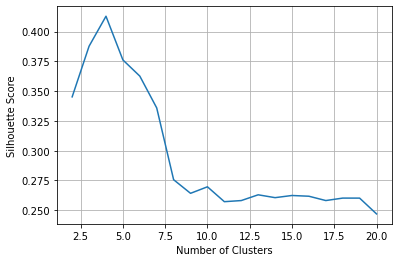

In [3]:
## c) Using the silhouette score to estimate the number of clusters for this dataset

## Defining the number of clusters to be considered
k_range = list(range(2, 21))

## Defining an empty list to store Silhouette scores
sil_scores = []

## Defining the input data
X = weather[['air_pressure_0_1', 'air_temp_0_1', 'avg_wind_direction_0_1', 'avg_wind_speed_0_1', 'max_wind_direction_0_1', 
             'max_wind_speed_0_1', 'relative_humidity_0_1']]

for i in tqdm(k_range):
    
    ## Fitting the k-means model
    kmeans_md = KMeans(n_clusters = i, n_init = 20).fit(X)
    
    ## Computing and storing the Silhouette score
    sil_scores.append(silhouette_score(X, kmeans_md.labels_))
    
    
## Visualizing the results
plt.plot(k_range, sil_scores)
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.grid()
plt.show()

## The optimal number of clusters to be considered is 4 (highest silhouette score)

In [4]:
## d) Using the KMeans function from the sklearn.cluster library to cluster the observations into
## the number of clusters estimated from part (c)

## Fitting the k-means model
kmeans_md = KMeans(n_clusters = 4, n_init = 20).fit(X)

## Appending cluster labels to the data
weather['Cluster'] = kmeans_md.labels_

In [5]:
## e) Describing each of the clusters

## Cluster 1

weather[weather['Cluster'] == 0].describe()

## This cluster has a high average air_temp (70.6) and a very small average wind_speed (1.5). The mean rain accumulation
## is also zero. This weather seems indicative of a warm environment in the South West.

,rowID,air_pressure,air_temp,avg_wind_direction,avg_wind_speed,max_wind_direction,max_wind_speed,min_wind_direction,min_wind_speed,rain_accumulation,rain_duration,relative_humidity,air_pressure_0_1,air_temp_0_1,avg_wind_direction_0_1,avg_wind_speed_0_1,max_wind_direction_0_1,max_wind_speed_0_1,relative_humidity_0_1,Cluster
count,3428.000000,3428.000000,3428.000000,3428.000000,3428.000000,3428.000000,3428.000000,3428.000000,3428.000000,3428.0,3428.0,3428.000000,3428.000000,3428.000000,3428.000000,3428.000000,3428.000000,3428.000000,3428.000000,3428.0
mean,40710.745041,916.821091,70.618139,341.355601,1.519632,20.840432,2.134656,308.016628,0.956009,0.0,0.0,33.058285,0.612109,0.551158,0.950851,0.064942,0.058051,0.078863,0.321809,0.0
std,18803.301277,1.421600,7.339185,20.137444,1.005371,22.336000,1.273741,42.751650,0.810251,0.0,0.0,14.215578,0.142160,0.159895,0.056093,0.042965,0.062217,0.049370,0.162464,0.0
min,346.000000,911.600000,46.220000,209.000000,0.000000,0.000000,0.100000,71.000000,0.000000,0.0,0.0,8.700000,0.090000,0.019608,0.582173,0.000000,0.000000,0.000000,0.043429,0.0
25%,30409.750000,915.900000,66.380000,335.000000,0.700000,5.000000,1.200000,290.000000,0.300000,0.0,0.0,24.300000,0.520000,0.458824,0.933148,0.029915,0.013928,0.042636,0.221714,0.0
50%,39652.500000,916.800000,71.420000,348.000000,1.300000,13.000000,1.900000,324.000000,0.700000,0.0,0.0,29.400000,0.610000,0.568627,0.969359,0.055556,0.036212,0.069767,0.280000,0.0
75%,55318.250000,917.900000,76.280000,355.000000,2.100000,28.000000,2.800000,338.000000,1.500000,0.0,0.0,39.000000,0.720000,0.674510,0.988858,0.089744,0.077994,0.104651,0.389714,0.0
max,74473.000000,920.700000,90.500000,359.000000,7.000000,141.000000,8.700000,357.000000,5.500000,0.0,0.0,90.100000,1.000000,0.984314,1.000000,0.299145,0.392758,0.333333,0.973714,0.0


In [6]:
## Cluster 2

weather[weather['Cluster'] == 1].describe()

## This cluster has a very low average air_temp (54.5) and a very high average wind_speed (2.55) which is higher than any other
## cluster. The mean rain accumulation is almost zero and the average wind direction is much different from that of other clusters.
## The relative humidity is also very large, the highest of the considered clusters.

,rowID,air_pressure,air_temp,avg_wind_direction,avg_wind_speed,max_wind_direction,max_wind_speed,min_wind_direction,min_wind_speed,rain_accumulation,rain_duration,relative_humidity,air_pressure_0_1,air_temp_0_1,avg_wind_direction_0_1,avg_wind_speed_0_1,max_wind_direction_0_1,max_wind_speed_0_1,relative_humidity_0_1,Cluster
count,16457.000000,16457.000000,16457.000000,16457.000000,16457.000000,16457.000000,16457.000000,16457.000000,16457.000000,16457.000000,16457.000000,16457.000000,16457.000000,16457.000000,16457.000000,16457.000000,16457.000000,16457.000000,16457.000000,16457.0
mean,33089.609528,915.714626,54.475828,192.777785,2.551583,203.237407,3.154257,182.176156,1.928997,0.000132,0.396792,82.126560,0.501463,0.199473,0.536985,0.109042,0.566121,0.118382,0.882589,1.0
std,21472.485640,1.770317,5.344778,68.833254,1.900154,70.701547,2.243450,69.337709,1.608946,0.002328,4.211740,11.099166,0.177032,0.116444,0.191736,0.081203,0.196940,0.086955,0.126848,0.0
min,4.000000,910.700000,45.320000,0.000000,0.100000,0.000000,0.100000,0.000000,0.000000,0.000000,0.000000,47.500000,0.000000,0.000000,0.000000,0.004274,0.000000,0.000000,0.486857,1.0
25%,10662.000000,914.700000,50.720000,172.000000,1.100000,184.000000,1.500000,160.000000,0.700000,0.000000,0.000000,71.900000,0.400000,0.117647,0.479109,0.047009,0.512535,0.054264,0.765714,1.0
50%,35159.000000,915.700000,53.060000,196.000000,2.100000,208.000000,2.600000,187.000000,1.500000,0.000000,0.000000,89.000000,0.500000,0.168627,0.545961,0.089744,0.579387,0.096899,0.961143,1.0
75%,57895.000000,916.900000,58.100000,226.000000,3.500000,239.000000,4.300000,213.000000,2.800000,0.000000,0.000000,91.500000,0.620000,0.278431,0.629526,0.149573,0.665738,0.162791,0.989714,1.0
max,67119.000000,920.000000,68.900000,359.000000,23.400000,359.000000,25.900000,359.000000,21.600000,0.120000,60.000000,92.400000,0.930000,0.513725,1.000000,1.000000,1.000000,1.000000,1.000000,1.0


In [7]:
## Cluster 3

weather[weather['Cluster'] == 2].describe()

## This cluster has the highest average air_temp (72.8) and an average wind_speed of 2.2. Again, the mean rain accumulation
## is also almost equal to zero.

,rowID,air_pressure,air_temp,avg_wind_direction,avg_wind_speed,max_wind_direction,max_wind_speed,min_wind_direction,min_wind_speed,rain_accumulation,rain_duration,relative_humidity,air_pressure_0_1,air_temp_0_1,avg_wind_direction_0_1,avg_wind_speed_0_1,max_wind_direction_0_1,max_wind_speed_0_1,relative_humidity_0_1,Cluster
count,26076.000000,26076.000000,26076.000000,26076.000000,26076.000000,26076.000000,26076.000000,26076.000000,26076.000000,26076.000000,26076.000000,26076.000000,26076.000000,26076.000000,26076.000000,26076.000000,26076.000000,26076.000000,26076.000000,26076.0
mean,35577.517948,917.001285,72.796473,213.742944,2.171023,231.633149,2.693243,195.991448,1.629326,0.000022,0.022243,34.334008,0.630128,0.598616,0.595384,0.092779,0.645218,0.100513,0.336389,2.0
std,21833.873913,1.561752,5.548369,53.442302,1.306829,54.814966,1.467988,57.045512,1.187027,0.001560,1.039712,13.189734,0.156175,0.120879,0.148864,0.055847,0.152688,0.056899,0.150740,0.0
min,1.000000,911.100000,52.520000,66.000000,0.000000,141.000000,0.100000,1.000000,0.000000,0.000000,0.000000,4.900000,0.040000,0.156863,0.183844,0.000000,0.392758,0.000000,0.000000,2.0
25%,16645.750000,915.900000,68.720000,178.000000,1.100000,190.000000,1.500000,166.000000,0.700000,0.000000,0.000000,24.500000,0.520000,0.509804,0.495822,0.047009,0.529248,0.054264,0.224000,2.0
50%,30896.500000,917.100000,72.500000,202.000000,2.000000,216.000000,2.500000,187.000000,1.400000,0.000000,0.000000,32.600000,0.640000,0.592157,0.562674,0.085470,0.601671,0.093023,0.316571,2.0
75%,53840.250000,918.100000,77.000000,227.000000,3.000000,253.000000,3.600000,212.000000,2.300000,0.000000,0.000000,43.900000,0.740000,0.690196,0.632312,0.128205,0.704735,0.135659,0.445714,2.0
max,74484.000000,920.700000,91.220000,357.000000,8.600000,359.000000,10.100000,359.000000,7.500000,0.200000,60.000000,66.200000,1.000000,1.000000,0.994429,0.367521,1.000000,0.387597,0.700571,2.0


In [8]:
## Cluster 4

weather[weather['Cluster'] == 3].describe()

## This cluster also has the high average air_temp (70.9) and an average wind_speed of 2.2. Again, the mean rain accumulation
## is also almost equal to zero. This cluster has the smallest relative humidity value of 30.4.

,rowID,air_pressure,air_temp,avg_wind_direction,avg_wind_speed,max_wind_direction,max_wind_speed,min_wind_direction,min_wind_speed,rain_accumulation,rain_duration,relative_humidity,air_pressure_0_1,air_temp_0_1,avg_wind_direction_0_1,avg_wind_speed_0_1,max_wind_direction_0_1,max_wind_speed_0_1,relative_humidity_0_1,Cluster
count,28508.000000,28508.000000,28508.000000,28508.000000,28508.000000,28508.000000,28508.000000,28508.000000,28508.000000,28508.000000,28508.000000,28508.000000,28508.000000,28508.000000,28508.000000,28508.000000,28508.000000,28508.000000,28508.000000,28508.0
mean,40745.317244,917.000319,70.893487,42.651256,2.158608,58.301740,2.616416,95.157780,1.700912,0.000004,0.009471,30.416879,0.630032,0.557157,0.118806,0.092248,0.162400,0.097536,0.291621,3.0
std,20905.152060,1.533152,6.824779,27.997383,1.324822,30.509621,1.548850,121.995391,1.126045,0.000375,0.646028,13.259078,0.153315,0.148688,0.077987,0.056616,0.084985,0.060033,0.151532,0.0
min,2.000000,911.300000,46.040000,0.000000,0.100000,0.000000,0.100000,0.000000,0.000000,0.000000,0.000000,4.900000,0.060000,0.015686,0.000000,0.004274,0.000000,0.000000,0.000000,3.0
25%,24316.750000,915.700000,66.020000,20.000000,1.200000,37.000000,1.500000,21.000000,0.900000,0.000000,0.000000,21.500000,0.500000,0.450980,0.055710,0.051282,0.103064,0.054264,0.189714,3.0
50%,44393.500000,917.200000,71.240000,40.000000,1.800000,53.000000,2.200000,42.000000,1.500000,0.000000,0.000000,28.200000,0.650000,0.564706,0.111421,0.076923,0.147632,0.081395,0.266286,3.0
75%,56937.250000,918.200000,75.560000,58.000000,2.800000,72.000000,3.300000,84.000000,2.200000,0.000000,0.000000,35.900000,0.750000,0.658824,0.161560,0.119658,0.200557,0.124031,0.354286,3.0
max,74332.000000,920.700000,90.680000,132.000000,8.900000,248.000000,11.000000,359.000000,7.200000,0.060000,50.000000,79.700000,1.000000,0.988235,0.367688,0.380342,0.690808,0.422481,0.854857,3.0


In [2]:
## 15. Using the pandas library to read the csv files and create two data-frames called: telecom_train (for churn-bigml-80.csv)
## and telecom_test (for churn-bigml-20.csv)

## Defining the bucket
s3 = boto3.resource('s3')
bucket_name = 'data-445-bucket-callaghan'
bucket = s3.Bucket(bucket_name)

## Defining the csv file
file_key = 'churn-bigml-80.csv'
file_key2 = 'churn-bigml-20.csv'

bucket_object = bucket.Object(file_key)
bucket_object2 = bucket.Object(file_key2)

file_object = bucket_object.get()
file_object2 = bucket_object2.get()

file_content_stream = file_object.get('Body')
file_content_stream2 = file_object2.get('Body')

telecom_train = pd.read_csv(file_content_stream)
telecom_test = pd.read_csv(file_content_stream2)

telecom_train.head()

,State,Account_length,Area_code,International_plan,Voice_mail_plan,Number_vmail_messages,Total_day_minutes,Total_day_calls,Total_day_charge,Total_eve_minutes,Total_eve_calls,Total_eve_charge,Total_night_minutes,Total_night_calls,Total_night_charge,Total_intl_minutes,Total_intl_calls,Total_intl_charge,Customer_service_calls,Churn
0,KS,128,415,No,Yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,No,Yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,No,No,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,Yes,No,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,Yes,No,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [3]:
## b) Feature engineering:

## Changing the Churn variable from a categorical variable to a numerical variable
telecom_train['Churn'] = np.where(telecom_train['Churn'] == True, 1, 0)
telecom_test['Churn'] = np.where(telecom_test['Churn'] == True, 1, 0)

## Changing the International_plan variable from a categorical variable to a numerical variable
telecom_train['International_plan'] = np.where(telecom_train['International_plan'] == 'Yes', 1, 0)
telecom_test['International_plan'] = np.where(telecom_test['International_plan'] == 'Yes', 1, 0)

## Changing the Voice_mail_plan variable from a categorical variable to a numerical variable
telecom_train['Voice_mail_plan'] = np.where(telecom_train['Voice_mail_plan'] == 'Yes', 1, 0)
telecom_test['Voice_mail_plan'] = np.where(telecom_test['Voice_mail_plan'] == 'Yes', 1, 0)

## Creating a new variable called: total_charge as the sum of Total_day_charge, Total_eve_charge, Total_night_charge, 
## and Total_intl_charge 
telecom_train['total_charge'] = telecom_train['Total_day_charge'] + telecom_train['Total_eve_charge'] + telecom_train['Total_night_charge'] + telecom_train['Total_intl_charge']
telecom_test['total_charge'] = telecom_test['Total_day_charge'] + telecom_test['Total_eve_charge'] + telecom_test['Total_night_charge'] + telecom_test['Total_intl_charge']

In [4]:
## c) Keeping the following variables: 
## Account_length, International_plan, Voice_mail_plan, total_charge, Customer_service_calls, and Churn

telecom_train = telecom_train[['Account_length', 'International_plan', 'Voice_mail_plan','total_charge', 'Customer_service_calls', 'Churn']]
telecom_test = telecom_test[['Account_length', 'International_plan', 'Voice_mail_plan','total_charge', 'Customer_service_calls', 'Churn']]

In [63]:
## d) Considering the telecom train dataset:

## Defining empty list to store results
importances = []


## Repeating the steps 1000 times:
for i in tqdm(range(0, 1000)):
    
    ## Defining the input and target variables:
    X = telecom_train[['Account_length', 'International_plan', 'Voice_mail_plan','total_charge', 'Customer_service_calls']]
    Y = telecom_train['Churn']

    ## Splitting the data into training and testing sets
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, stratify = Y)


    ## Building the Random Forest model
    md1 = RandomForestClassifier(n_estimators = 500, max_depth = 3).fit(X_train, Y_train)

    ## Extracting Random Forest variable importance
    importances.append(md1.feature_importances_)


    ## Building the AdaBoost model
    md2 = AdaBoostClassifier(base_estimator = DecisionTreeClassifier(max_depth = 3), n_estimators = 500, 
                             learning_rate = 0.01).fit(X_train, Y_train)

    ## Extracting AdaBoost variable importance
    importances.append(md2.feature_importances_)


    ## Building the GradientBoosting model
    md3 = GradientBoostingClassifier(max_depth = 3, n_estimators = 500, learning_rate = 0.01).fit(X_train, Y_train)

    ## Extracting GradientBoosting variable importance
    importances.append(md3.feature_importances_)

    
## Printing the average variable importance scores 
importances = pd.DataFrame(importances, columns = X.columns)
importances = pd.DataFrame(importances.mean()).T
importances

## total_charge, International_plan, Customer_service_calls, and Account_length are the Top-4 variables to be selected

100%|██████████| 1000/1000 [52:35<00:00,  3.16s/it]


,Account_length,International_plan,Voice_mail_plan,total_charge,Customer_service_calls
0,0.111588,0.170069,0.080307,0.489589,0.148447


In [5]:
## Random Forest Parameters:

def expand_grid(dictionary):
    return pd.DataFrame([row for row in product(*dictionary.values())], columns = dictionary.keys())

dictionary = {'n_tree': [100, 500, 1000, 1500, 2000], 'depth': [3, 5, 7]}
RF_parameters = expand_grid(dictionary)
RF_parameters['Acc.'] = np.nan
RF_parameters['Rec.'] = np.nan

In [6]:
## AdaBoost Parameters:

def expand_grid(dictionary):
    return pd.DataFrame([row for row in product(*dictionary.values())], columns = dictionary.keys())

dictionary = {'n_tree': [100, 500, 1000, 1500, 2000], 'depth': [3, 5, 7], 'learning_rate': [0.1, 0.01, 0.001]}
Ada_parameters = expand_grid(dictionary)
Ada_parameters['Acc.'] = np.nan
Ada_parameters['Rec.'] = np.nan

In [7]:
## Gradient Boosting Parameters:

def expand_grid(dictionary):
    return pd.DataFrame([row for row in product(*dictionary.values())], columns = dictionary.keys())

dictionary = {'n_tree': [100, 500, 1000, 1500, 2000], 'depth': [3, 5, 7], 'learning_rate': [0.1, 0.01, 0.001]}
GB_parameters = expand_grid(dictionary)
GB_parameters['Acc.'] = np.nan
GB_parameters['Rec.'] = np.nan

In [ ]:
## e) Considering the telecom train dataset:

## Defining the input and target variables:
X = telecom_train[['Account_length', 'International_plan', 'total_charge', 'Customer_service_calls']]
Y = telecom_train['Churn']

## Defining empty lists to store results
rf_results = []
ada_results = []
gb_results = []


## Repeating the following steps 100 times
for j in tqdm(range(0, 10)):

    ## Splitting the data into training and testing sets
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, stratify = Y)


    ###################
    ## Random Forest ##
    ###################

    ## Defining the number of models to consider
    n = RF_parameters.shape[0]

    for i in range(0, n):

        ## Building the model
        rf_md = RandomForestClassifier(n_estimators = RF_parameters.loc[i, 'n_tree'], 
                                       max_depth = RF_parameters.loc[i, 'depth']).fit(X_train, Y_train)

        ## Predicting on the test set
        rf_preds = rf_md.predict_proba(X_test)[:, 1]

        ## Applying the cut-off value
        rf_preds = np.where(rf_preds < 0.1, 0, 1)
        
        ## Appending model information and performance
        rf_results.append([RF_parameters.loc[i, 'n_tree'], RF_parameters.loc[i, 'depth'], 
                          accuracy_score(Y_test, rf_preds), recall_score(Y_test, rf_preds)])


    ##############
    ## AdaBoost ##
    ##############

    ## Defining the number of models to consider
    n = Ada_parameters.shape[0]

    for i in range(0, n):

        ## Building the model
        ada_md = AdaBoostClassifier(base_estimator = DecisionTreeClassifier(max_depth = Ada_parameters.loc[i, 'depth']), 
                                    n_estimators = Ada_parameters.loc[i, 'n_tree'], 
                                    learning_rate = Ada_parameters.loc[i, 'learning_rate']).fit(X_train, Y_train)

        ## Predicting on the test set
        ada_preds = ada_md.predict_proba(X_test)[:, 1]

        ## Applying the cut-off value
        ada_preds = np.where(ada_preds < 0.1, 0, 1)

        ## Appending model information and performance
        ada_results.append([Ada_parameters.loc[i, 'n_tree'], Ada_parameters.loc[i, 'depth'], 
                            Ada_parameters.loc[i, 'learning_rate'], accuracy_score(Y_test, ada_preds), 
                            recall_score(Y_test, ada_preds)])


    ######################
    ## GradientBoosting ##
    ######################

    ## Defining the number of models to consider
    n = GB_parameters.shape[0]

    for i in range(0, n):

        ## Building the model
        gb_md = GradientBoostingClassifier(max_depth = GB_parameters.loc[i, 'depth'], 
                                           n_estimators = GB_parameters.loc[i, 'n_tree'], 
                                           learning_rate = GB_parameters.loc[i, 'learning_rate']).fit(X_train, Y_train)

        ## Predicting on the test set
        gb_preds = gb_md.predict_proba(X_test)[:, 1]

        ## Applying the cut-off value
        gb_preds = np.where(gb_preds < 0.1, 0, 1)

        ## Appending model information and performance
        gb_results.append([GB_parameters.loc[i, 'n_tree'], GB_parameters.loc[i, 'depth'], 
                           GB_parameters.loc[i, 'learning_rate'], accuracy_score(Y_test, gb_preds), 
                           recall_score(Y_test, gb_preds)])

100%|██████████| 10/10 [58:17<00:00, 349.77s/it]


In [10]:
## f) Identifing the best model of each of the frameworks

## Finding the optimal parameters combination for Random Forest

RF_results = pd.DataFrame(columns = ['Trees', 'Depth', 'Accuracy', 'Recall'], data = rf_results)
RF_results['Average Performance'] = (RF_results['Accuracy'] + RF_results['Recall']) / 2
RF_results = RF_results.groupby(['Trees', 'Depth']).mean().reset_index(drop = False)
RF_results.sort_values('Average Performance', ascending = False).reset_index(drop = True).head()

,Trees,Depth,Accuracy,Recall,Average Performance
0,100,7,0.897940,0.870513,0.884226
1,500,7,0.898127,0.869231,0.883679
2,1500,7,0.897753,0.867949,0.882851
3,1000,7,0.897378,0.867949,0.882663
4,2000,5,0.894007,0.870513,0.882260


In [11]:
## Finding the optimal parameters combination for AdaBoost

Ada_results = pd.DataFrame(columns = ['Trees', 'Depth', 'Learning Rate', 'Accuracy', 'Recall'], data = ada_results)
Ada_results['Average Performance'] = (Ada_results['Accuracy'] + Ada_results['Recall']) / 2
Ada_results = Ada_results.groupby(['Trees', 'Depth', 'Learning Rate']).mean().reset_index(drop = False)
Ada_results.sort_values('Average Performance', ascending = False).reset_index(drop = True).head()

,Trees,Depth,Learning Rate,Accuracy,Recall,Average Performance
0,1000,3,0.001,0.870225,0.865385,0.867805
1,100,3,0.010,0.870225,0.865385,0.867805
2,100,3,0.001,0.870412,0.862821,0.866616
3,500,3,0.001,0.869288,0.858974,0.864131
4,100,5,0.001,0.903184,0.816667,0.859925


In [12]:
## Finding the optimal parameters combination for GradientBoosting

GB_results = pd.DataFrame(columns = ['Trees', 'Depth', 'Learning Rate', 'Accuracy', 'Recall'], data = gb_results)
GB_results['Average Performance'] = (GB_results['Accuracy'] + GB_results['Recall']) / 2
GB_results = GB_results.groupby(['Trees', 'Depth', 'Learning Rate']).mean().reset_index(drop = False)
GB_results.sort_values('Average Performance', ascending = False).reset_index(drop = True).head()

,Trees,Depth,Learning Rate,Accuracy,Recall,Average Performance
0,100,5,0.010,0.902996,0.861538,0.882267
1,1000,5,0.001,0.902809,0.861538,0.882174
2,1500,5,0.001,0.903933,0.856410,0.880171
3,2000,5,0.001,0.903933,0.856410,0.880171
4,500,5,0.010,0.902809,0.855128,0.878969


In [18]:
## g) Using the telecom_train to build three models: the best random forest model from part (f), the best AdaBoost 
## model form part (f), and the best gradient boosting model form part (f)

## Defining the input and target variables
X = telecom_train[['Account_length', 'International_plan', 'total_charge', 'Customer_service_calls']]
X_test = telecom_test[['Account_length', 'International_plan', 'total_charge', 'Customer_service_calls']]

Y = telecom_train['Churn']
Y_test = telecom_test['Churn']


###################
## Random Forest ##
###################

## Building the model
rf_md = RandomForestClassifier(n_estimators = 100, max_depth = 7).fit(X, Y)

## Predicting on the test set
rf_preds = rf_md.predict_proba(X_test)[:, 1]


###############
## AdaBoost ##
##############

## Building the model
ada_md = AdaBoostClassifier(base_estimator = DecisionTreeClassifier(max_depth = 3), n_estimators = 1000, 
                           learning_rate = 0.001).fit(X, Y)

## Predicting on the test set
ada_preds = ada_md.predict_proba(X_test)[:, 1]



######################
## GradientBoosting ##
######################

## Building the model
gb_md = GradientBoostingClassifier(max_depth = 5, n_estimators = 100, learning_rate = 0.01).fit(X, Y)

## Predicting on the test set
gb_preds = gb_md.predict_proba(X_test)[:, 1]



## Combining the estimated likelihoods and using a random forest model with 500 trees and maximum depth equal to 3
## to predict the likelihood of churn

X_rf = pd.concat([pd.DataFrame(rf_preds), pd.DataFrame(ada_preds), pd.DataFrame(gb_preds)], axis = 1)

# ## Defining the input and target variables
# X = X_rf.drop(columns = 'Churn')
# Y = Y_test

## Building the model
final_md = RandomForestClassifier(n_estimators = 500, max_depth = 3).fit(X_rf, Y_test)

## Extracting the ensemble likelihoods
rf_preds = final_md.predict_proba(X_rf)[:, 1]

## Using 15% as the cut-off value
rf_preds_label = np.where(rf_preds < 0.1, 0, 1)

## Reporting the accuracy and recall scores of the model
print('Accuracy Score of Random Forest Classifier:', accuracy_score(Y_test, rf_preds_label))
print('Recall Score of Random Forest Classifier:', recall_score(Y_test, rf_preds_label))


## After combining the estimated likelihoods, we end up with an accuracy of about 91% and a recall of
## about 88%, slightly higher than the prediction power of a single type of model.

Accuracy Score of Random Forest Classifier: 0.9055472263868066
Recall Score of Random Forest Classifier: 0.8842105263157894
